<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract

2.

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

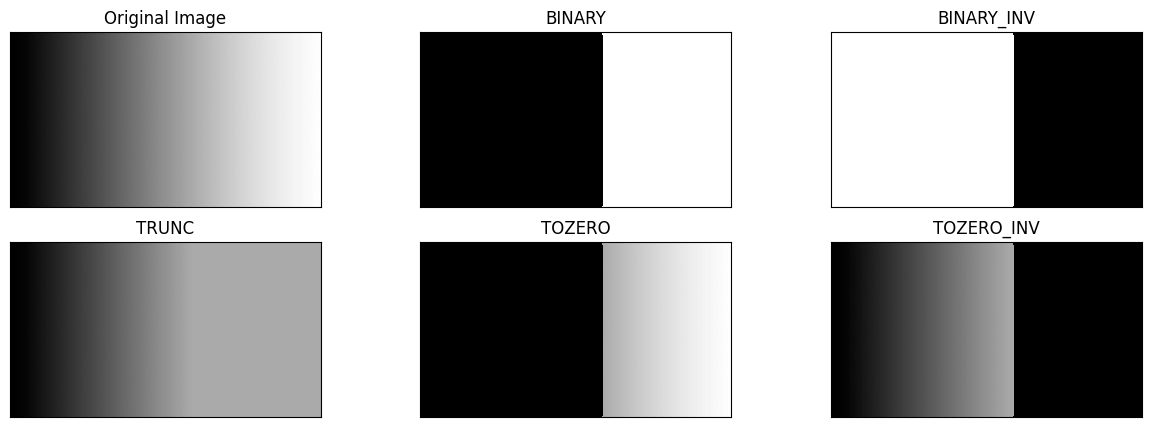

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv2.imread(filename)
thresh1 = cv2.imread(filename)
thresh2 = cv2.imread(filename)
thresh3 = cv2.imread(filename)
thresh4 = cv2.imread(filename)
thresh5 = cv2.imread(filename)
thresh = 170

thresh1[img>thresh] = 255
thresh1[img<=thresh] = 0

thresh2 = 255 - thresh1

thresh3[img>thresh] = thresh

thresh4[img<=thresh] = 0

thresh5[img>thresh] = 0

title = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15, 5))
for i in range(len(images)):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(title[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

156


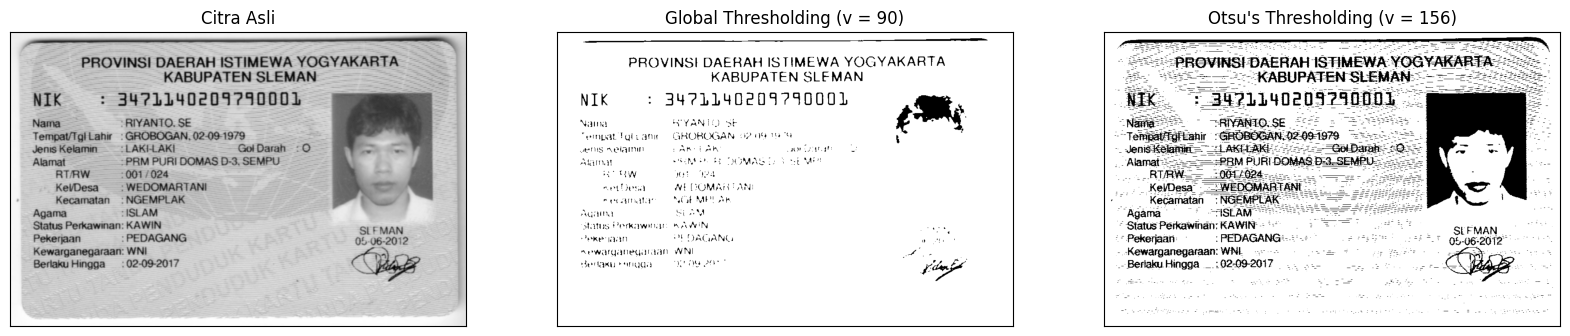

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktp-1024x660.jpg')

img = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0 / pixel_number
  his, bins = np.histogram(gray, np.arange(0, 257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]:
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ") + str(otsu_thresh) + (")")
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20, 15))
for i in range(len(citra3)):
  plt.subplot(1, 3, i+1), plt.imshow(citra3[i], cmap='gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5.  Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi
- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

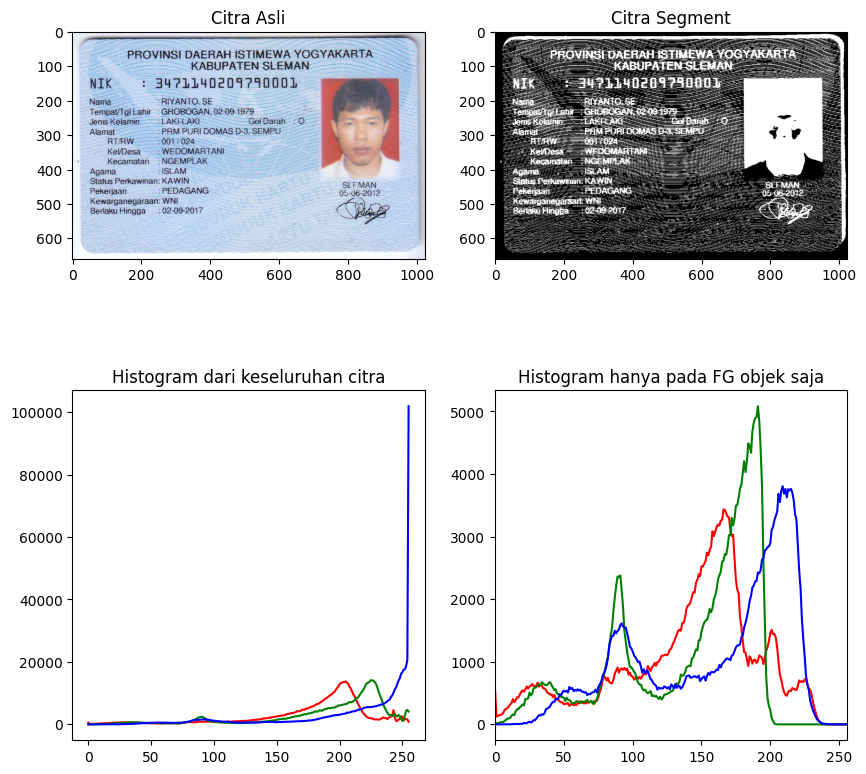

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktp-1024x660.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask,'gray')
plt.title('Citra Segment')
color = ('r', 'g', 'b')
for i, col in enumerate(color):
  hist0 = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.subplot(2, 2, 3), plt.plot(hist0, color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv2.calcHist([img], [i], mask, [256], [0,256])
  plt.subplot(2, 2, 4), plt.plot(hist1, color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

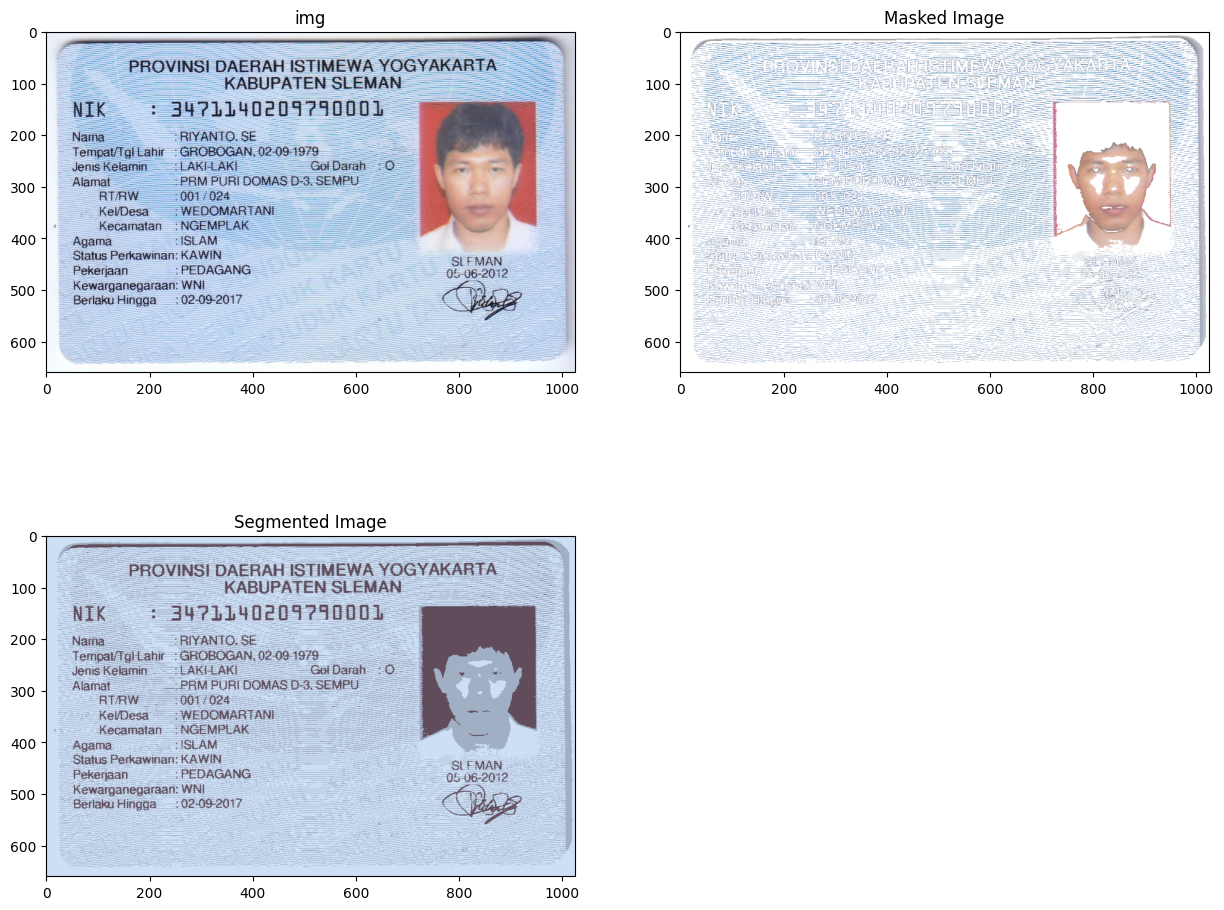

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktp-1024x660.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()

segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1), plt.imshow(img), plt.title('img')
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title('Masked Image')
plt.subplot(2, 2, 3), plt.imshow(segmented_image), plt.title('Segmented Image')
plt.show()


E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali
tulisan.

1. Install PIP OCR

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (27.4 MB/s)
debconf: unable to init

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [ ]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [ ]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp-1024x660.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34?2140209?900D01 Sk,
Nama RIYANTO. SE £ PA
Tempat/Tgl Lahir : GROBOGAN. 02-09-1979 “ "
Jenis Kelamin LAKI-LAKI GolDarah - 0 "
Alamat PRM PURI DOMAS D-3. SEMPU

RT/RW 001 1024

Kel/Desa WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama :ISLAM

Status Perkawinan: KAWIN ENY
Pekerjaan : PEDAGANG 08 6.20 »
Kewarganegaraan: WNI N

Berlaku Hingga 02-09-2017

 



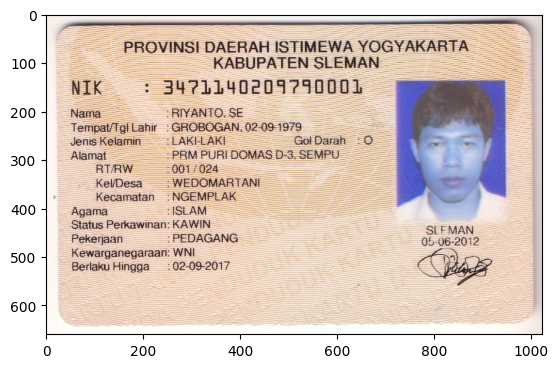

In [ ]:
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/ktp-1024x660.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

4. Menambahkan kotak untuk deteksi teksi pada gambar

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i],
    text1['width'][i], text1['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
    display(img)